Saving dataset_with_anomaly_types.csv to dataset_with_anomaly_types (2).csv


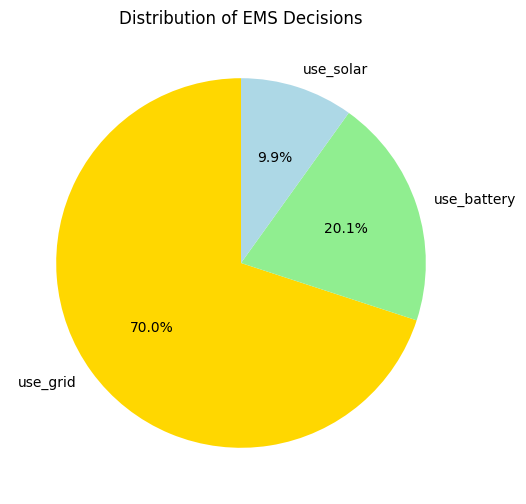

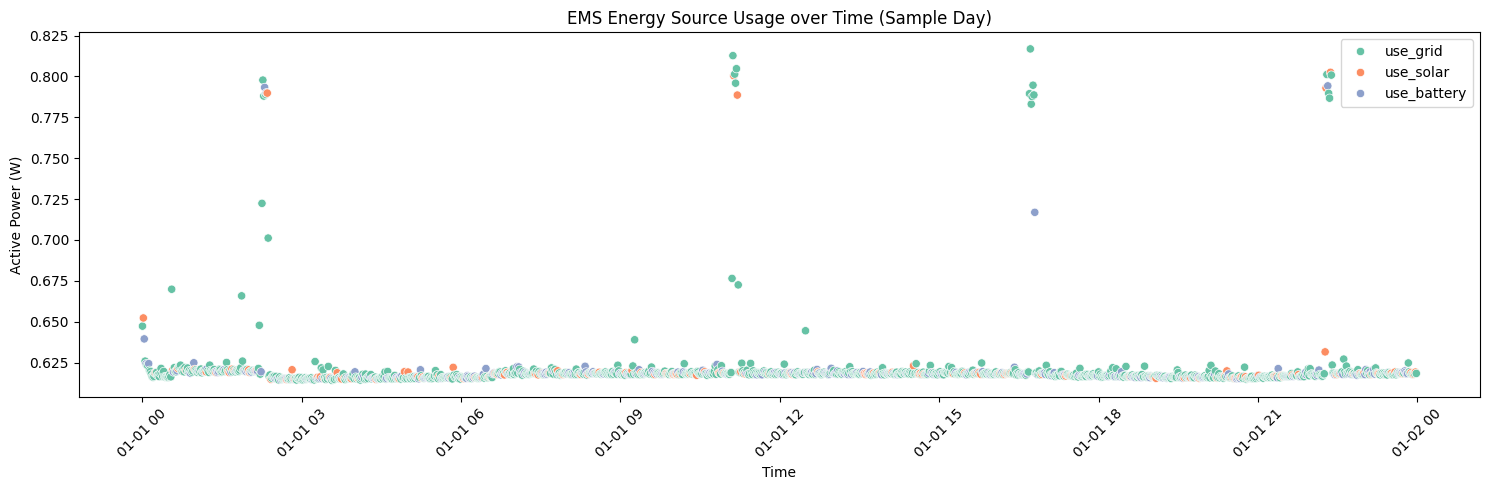

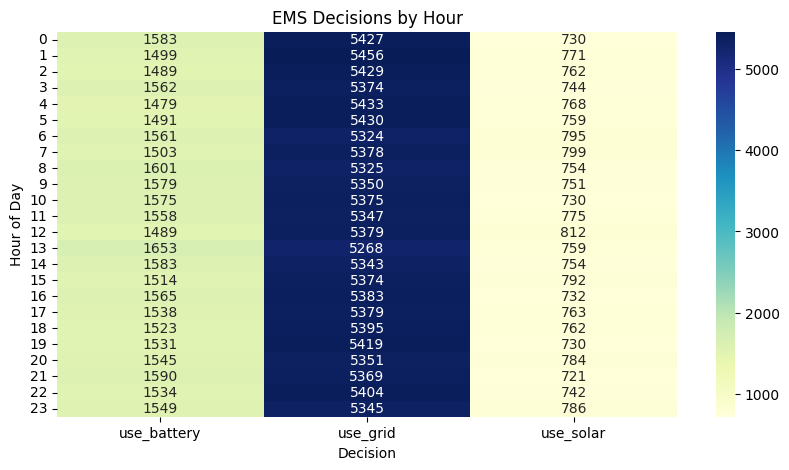

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()
df = pd.read_csv("dataset_with_anomaly_types.csv")
df.head()

# Convert timestamp column
df['timestamp'] = pd.to_datetime(df['timestamp'])

# --- 3. SIMPLE EMS STRATEGY FUNCTION ---
def ems_decision(row):
    # Example: if solar power is available, use it first
    # If battery is available and solar not, use battery
    # Else use grid
    if row['energy_source'] == 'solar':
        return 'use_solar'
    elif row['energy_source'] == 'battery':
        return 'use_battery'
    else:
        return 'use_grid'

# Apply EMS decision logic
df['EMS_Decision'] = df.apply(ems_decision, axis=1)

# --- 4. OPTIONAL: Extract HOUR and DAY for analysis ---
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.date

# --- 5. VISUALIZATION: Pie Chart of Energy Decisions ---
plt.figure(figsize=(6,6))
df['EMS_Decision'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen', 'lightblue'])
plt.title("Distribution of EMS Decisions")
plt.ylabel("")
plt.show()

# --- 6. VISUALIZATION: Energy Decisions over Time (1 week sample) ---
sample_df = df[df['day'] == df['day'].unique()[0]]  # Select one day
plt.figure(figsize=(15,5))
sns.scatterplot(data=sample_df, x='timestamp', y='Active_Power_W', hue='EMS_Decision', palette='Set2')
plt.title("EMS Energy Source Usage over Time (Sample Day)")
plt.xlabel("Time")
plt.ylabel("Active Power (W)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 7. VISUALIZATION: Heatmap of EMS decisions by hour ---
heatmap_data = pd.crosstab(df['hour'], df['EMS_Decision'])
plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='d')
plt.title("EMS Decisions by Hour")
plt.xlabel("Decision")
plt.ylabel("Hour of Day")
plt.show()

# Save to new CSV
df.to_csv("dataset_with_ems_actions.csv", index=False)

# Download it from Colab
from google.colab import files
files.download("dataset_with_ems_actions.csv")
